# Exercise 3

The goal of this exercise is to implement a simple iterative algorithm to compute the largest singular value $\sigma_1$ of a matrix $A$ and the corresponding left and right singular vectors $u_1$ and $v_1$.

The idea is very simple. From the definition of the SVD we immediately have the following two relationships:
\begin{align}
Av_1 &= \sigma_1 u_1\nonumber\\
A^Tu_1 &= \sigma_1 v_1\nonumber
\end{align}

The idea is now to start with a random vector $w^{(0)}$, compute $\tilde{w}^{(1)} = Aw^{(0)}$, and approximate $\sigma_1\approx \tilde{\sigma}^{(1)}:= \|\tilde{w}^{(1)}\|_2$ and $u_1\approx w^{(1)}:= \tilde{w}^{(1)}/\tilde{\sigma}^{(1)}$. To obtain an approximation for $v_1$ we now multiply $\tilde{w}^{(2)} = A^Tw^{(1)}$ and normalize in the same way again to get a new approximation for $\sigma_1$ and an approximation for $v_1$. By repeating the process the hope is that we will convergence to $\sigma_1$, $u_1$ and $v_1$.

* Implement this algorithm. Define an iteration count n so that the above procedure is repeated n times.
* Store the approximations for $\sigma_1$ in each step and plot the convergence to the exact largest singular value.
* The convergence of the approximations to $u_1$ and $v_1$ can be measured by computing the angles to the exact singular vectors. Do this and also plot the convergence for the singular vectors.

Matrix A is:
[[ 0.15223424  0.42981558  0.43477318  0.05816162  0.7188142 ]
 [ 0.95040333  0.24496332  0.95785488  0.96804263  0.49212275]
 [ 0.96824432  0.80650967  0.43640452  0.81442342  0.92496346]
 [ 0.63286384  0.9336249   0.35847647  0.39254009  0.98625249]
 [ 0.44840696  0.3367516   0.75937737  0.07341741  0.14562427]
 [ 0.38975745  0.73463844  0.74229881  0.58647135  0.98505557]
 [ 0.99006683  0.56777693  0.43270824  0.73593997  0.60450614]
 [ 0.17289693  0.15112125  0.1457448   0.81946919  0.27547012]
 [ 0.03432977  0.43682929  0.31016507  0.27249143  0.66588701]
 [ 0.67038657  0.71634195  0.06887055  0.43313749  0.73355275]
 [ 0.54486406  0.47547551  0.24399485  0.1958604   0.50654832]
 [ 0.30704589  0.36339719  0.06230762  0.12658201  0.31268279]
 [ 0.91308151  0.46917663  0.34605784  0.01062306  0.35966039]
 [ 0.70094645  0.3890435   0.56470492  0.65787345  0.28799388]
 [ 0.83438445  0.01551531  0.73702288  0.46393679  0.39616403]
 [ 0.85278902  0.07998688  0.53605622  0.8

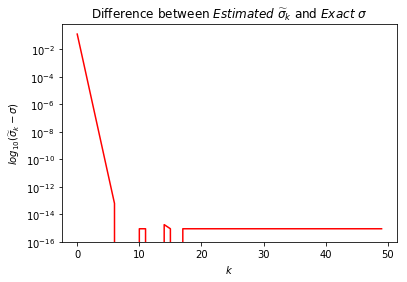

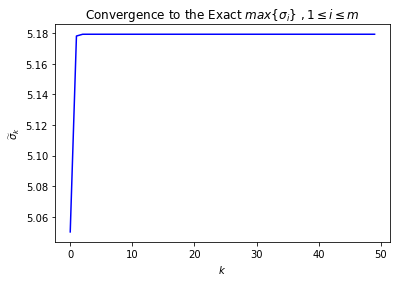

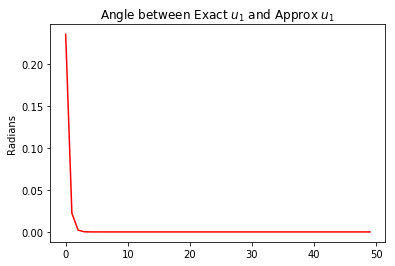

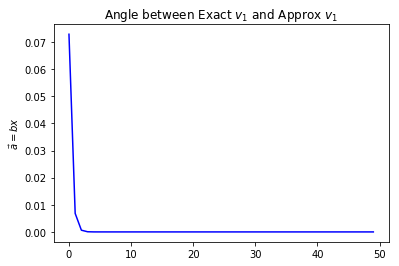

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.linalg import svd
import math as m

def SVD(A): 
    m,n = np.shape(A)
    nval = np.arange(50)
    sigma = [] 
    u_1 = []
    v_1 = []
    diff=[]
    w = np.random.rand(n)
    U,s,V= svd(A,full_matrices = False)
    sig_exact= np.max(abs(s))
    for i in nval: 
        w_t = A@w        
        w_t = w_t/np.linalg.norm(w_t,2) 
        u_1.append(w_t) 
        w = A.T@w_t
        sig = np.linalg.norm(w,2)
        sigma.append(sig) 
        w = w/sig 
        v_1.append(w) 
        diff.append(np.fabs(sigma[i] - sig_exact))
    return diff,sigma,nval,v_1,u_1,U,V


A = np.random.rand(20,5)
#A = np.array([[1,3,2],[5,2,1],[6,7,2]])
print('Matrix A is:')
print(A)
diff , sigma, nval,v_1,u_1,U,V = SVD(A)

'''Difference'''
plt.semilogy(nval,diff,'r',);
plt.xlabel('$k$')
plt.ylabel(r'$log_{10}(\widetilde{\sigma}_k - \sigma)$')
plt.title('Difference between $Estimated$ $\widetilde{\sigma}_k$ and $Exact$ $\sigma$');
plt.ylim(ymin = 1e-16)
plt.show()

'''Sigma convergence graph'''
plt.plot(nval,sigma,'b');
plt.xlabel('$k$')
plt.ylabel(r'$\widetilde{\sigma}_k$')
plt.title(r'Convergence to the Exact $max\{\sigma_i\} \ , 1\leq i \leq m$');
plt.show()

'''Defining Scalar product'''
def angle(a,b):
    return m.acos(np.clip(abs(np.dot(a,b)),-1,1))            #provided a,b are unit vectors of same dimension

'''Angle U_1'''
U1 = U[:,0]
angU = [angle(u,U1) for u in u_1]
plt.title('Angle between Exact $u_1$ and Approx $u_1$')
plt.plot(nval,angU,'r-');
plt.ylabel('Radians')
plt.show()

'''Angle V_1'''
V1 = V[0]
angV = [angle(v,V1) for v in v_1]
plt.title('Angle between Exact $v_1$ and Approx $v_1$')
plt.ylabel(r'$\vec{a}=bx$');
plt.plot(nval,angV,'b-');

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:18: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:23: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


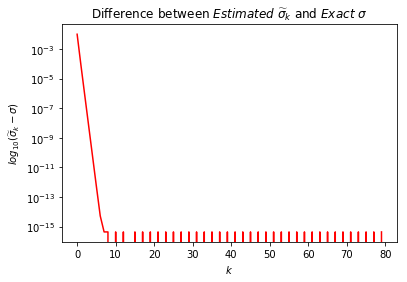

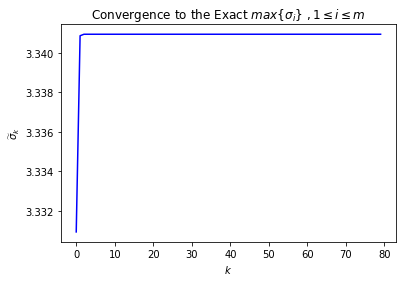

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.linalg import svd

def SVD(A): 
    m,n = np.shape(A)
    nval = np.arange(80)
    sigma = np.zeros_like(nval,dtype = 'float64')
    u_1 = np.zeros_like(nval,dtype = 'float64')
    v_1 = np.zeros_like(nval,dtype = 'float64')
    diff=np.zeros_like(nval,dtype = 'float64')
    w = np.random.rand(n)
    s= svd(A,full_matrices = False)[1]
    sig_exact= np.max(abs(s))
    for i in nval: 
        w_t = A@w        
        w_t = w_t/np.linalg.norm(w_t,2) 
        u_1[[i]] = w_t 
        w = A.T@w_t
        sig = np.linalg.norm(w,2)
        sigma[i] = sig 
        w = w/sig 
        v_1[[i]] = w
        diff[i] = abs(sigma[i] - sig_exact)
    return diff,sigma,nval

A = np.random.rand(8,4)
diff , sigma, nval = SVD(A)
plt.semilogy(nval,diff,'r');
plt.xlabel('$k$')
plt.ylabel(r'$log_{10}(\widetilde{\sigma}_k - \sigma)$')
plt.title('Difference between $Estimated$ $\widetilde{\sigma}_k$ and $Exact$ $\sigma$');
plt.show()
plt.plot(nval,sigma,'b');
plt.xlabel('$k$')
plt.ylabel(r'$\widetilde{\sigma}_k$')
plt.title('Convergence to the Exact $max\{\sigma_i\} \ , 1\leq i \leq m$');